<a href="https://colab.research.google.com/github/fahadrajput99/EDA-Using-Pandas/blob/main/kaggle_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [4]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [6]:
df_train=pd.read_csv('/content/train.csv')
df_train

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [7]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [8]:
df_train.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [9]:
print(df_train.duplicated().sum())

0


<Axes: >

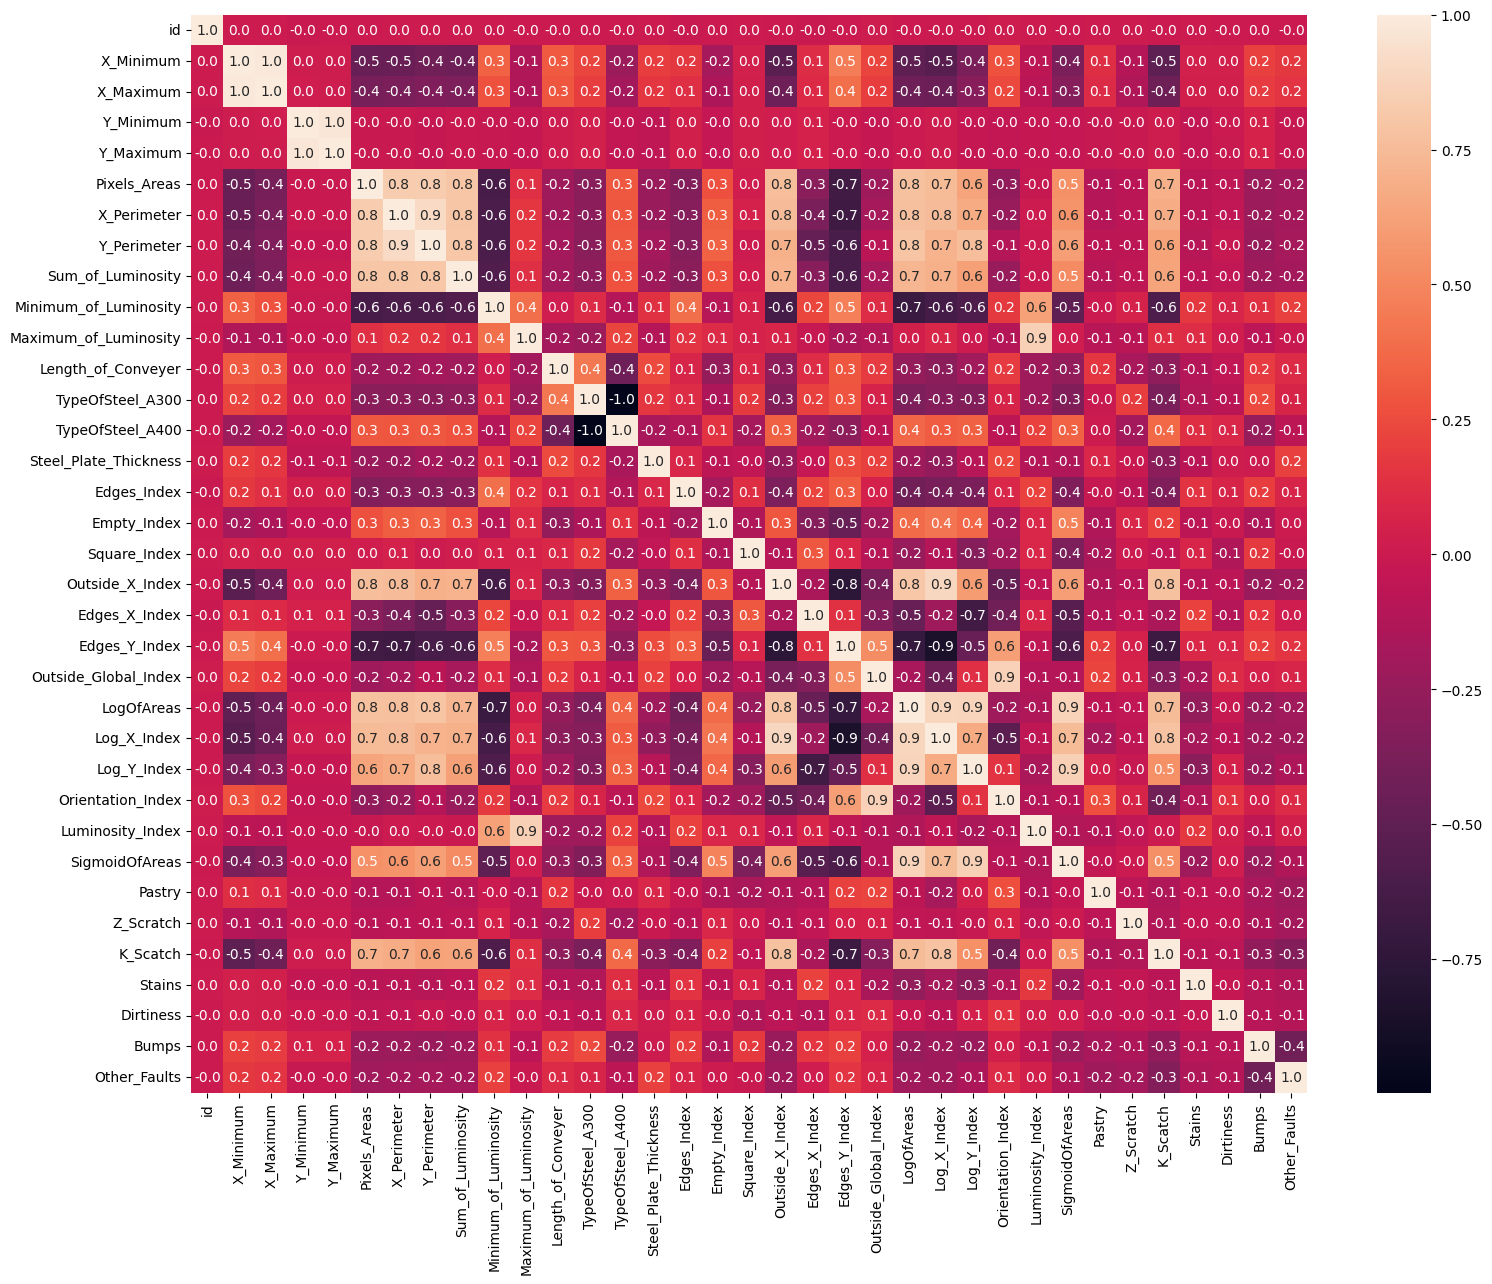

In [10]:
plt.figure(figsize=(18,14))
sns.heatmap(df_train.corr(),annot=True,fmt=".1f")

In [11]:
df_train.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [12]:
target = df_train[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']]

In [13]:
target.sum(axis=0)

Pastry          1466
Z_Scratch       1150
K_Scatch        3432
Stains           568
Dirtiness        485
Bumps           4763
Other_Faults    6558
dtype: int64

In [14]:
# split data features and target into variables
x = df_train.drop(['id','Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],axis=1)
y = target

In [15]:
# traning and testing splitting
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [16]:
# scale training and test data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13453, 27), (5766, 27), (13453, 7), (5766, 7))

In [18]:
# finding class weights
class_weights = {i: len(y_train.values) / (np.sum(y_train.values[:, i]) + 1) for i in range(y_train.shape[1])}
class_weights

{0: 13.150537634408602,
 1: 16.50674846625767,
 2: 5.582157676348547,
 3: 32.97303921568628,
 4: 38.994202898550725,
 5: 3.9955449955449955,
 6: 2.958654057620409}

In [19]:
model = Sequential([
    Flatten(),
    Dense(256, activation='relu', input_shape=(27,)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss=BinaryCrossentropy(),
              metrics=["accuracy"])

In [20]:
# traning started
history = model.fit(X_train,y_train,epochs=50,verbose=1,batch_size=28,validation_data=(X_test,y_test),
              class_weight=class_weights)

Epoch 1/50
481/481 [==============================] - 7s 6ms/step - loss: 2.1516 - accuracy: 0.3835 - val_loss: 0.3263 - val_accuracy: 0.3789
Epoch 2/50
481/481 [==============================] - 3s 5ms/step - loss: 2.0054 - accuracy: 0.4021 - val_loss: 0.2831 - val_accuracy: 0.4247
Epoch 3/50
481/481 [==============================] - 2s 5ms/step - loss: 2.0101 - accuracy: 0.3856 - val_loss: 0.3180 - val_accuracy: 0.4117
Epoch 4/50
481/481 [==============================] - 3s 7ms/step - loss: 1.9723 - accuracy: 0.3919 - val_loss: 0.3029 - val_accuracy: 0.3940
Epoch 5/50
481/481 [==============================] - 2s 5ms/step - loss: 1.9796 - accuracy: 0.3969 - val_loss: 0.3098 - val_accuracy: 0.3739
Epoch 6/50
481/481 [==============================] - 2s 5ms/step - loss: 1.9913 - accuracy: 0.3937 - val_loss: 0.2994 - val_accuracy: 0.3623
Epoch 7/50
481/481 [==============================] - 3s 5ms/step - loss: 1.9521 - accuracy: 0.3995 - val_loss: 0.3005 - val_accuracy: 0.4025
Epoch 

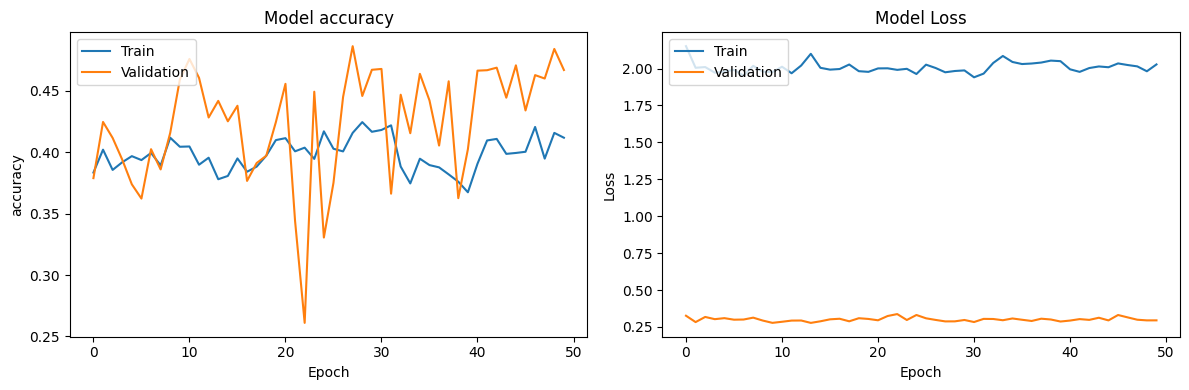

In [21]:
# visualization of loss and auc score
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [22]:
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [23]:
# store id in a variable
id_test=df_test.id
id_test.values

array([19219, 19220, 19221, ..., 32030, 32031, 32032])

In [24]:
df_test.drop('id',axis=1,inplace=True)

In [25]:
# scale test data
test = sc.transform(df_test)

In [26]:
# prediction on test data
y_pred = model.predict(test)
y_pred

401/401 [==============================] - 2s 4ms/step


array([[5.26544809e-01, 1.11469366e-04, 4.73380263e-04, ...,
        8.05701986e-02, 2.00335205e-01, 2.47817546e-01],
       [2.87091047e-01, 2.26173289e-02, 3.27656530e-02, ...,
        1.73413396e-01, 2.11405903e-01, 1.98285311e-01],
       [1.07864946e-01, 7.28122815e-02, 1.45222947e-01, ...,
        1.13605708e-01, 1.73994064e-01, 1.91266939e-01],
       ...,
       [2.39767269e-05, 4.63027880e-03, 8.57973039e-01, ...,
        7.13465269e-08, 7.30925705e-04, 5.08945286e-02],
       [3.52110058e-01, 5.19132335e-03, 1.02369422e-02, ...,
        1.40032634e-01, 2.08358631e-01, 2.11813912e-01],
       [4.89241120e-06, 2.32167542e-03, 9.13418114e-01, ...,
        5.15053333e-09, 2.63839844e-04, 4.04857062e-02]], dtype=float32)

In [27]:
# round it two decimal
y_pred = np.round(y_pred,2)

In [28]:
len(y_pred),len(id_test.values),y_pred.shape

(12814, 12814, (12814, 7))

In [29]:
# checking submission file look like
sample = pd.read_csv('/content/sample_submission.csv')
sample.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,19222,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,19223,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [30]:
# submission data frame created
sub = pd.DataFrame({'id' : id_test.values,
                     'Pastry':y_pred[:,0],
                     'Z_Scratch':y_pred[:,1],
                     'K_Scatch':y_pred[:,2],
                     'Stains':y_pred[:,3],
                     'Dirtiness':y_pred[:,4],
                     'Bumps':y_pred[:,5],
                     'Other_Faults':y_pred[:,6]})
sub.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.53,0.00,0.00,0.00,0.08,0.20,0.25
1,19220,0.29,0.02,0.03,0.00,0.17,0.21,0.20
2,19221,0.11,0.07,0.15,0.06,0.11,0.17,0.19
3,19222,0.24,0.07,0.08,0.04,0.20,0.21,0.19
4,19223,0.19,0.00,0.00,0.00,0.01,0.38,0.23


In [32]:
sub.to_csv('final_submission.csv',index=False)

In [37]:
import os
current_directory = os.getcwd()
print("Current Directory:", current_directory)


Current Directory: /content


In [38]:
sub.to_csv(r'C:\Users\xxxxxx\Desktop\final_submission.csv', index=False)

In [40]:
df=pd.read_csv('/content/final_submission.csv')
df

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.53,0.00,0.00,0.00,0.08,0.20,0.25
1,19220,0.29,0.02,0.03,0.00,0.17,0.21,0.20
2,19221,0.11,0.07,0.15,0.06,0.11,0.17,0.19
3,19222,0.24,0.07,0.08,0.04,0.20,0.21,0.19
4,19223,0.19,0.00,0.00,0.00,0.01,0.38,0.23
...,...,...,...,...,...,...,...,...
12809,32028,0.24,0.07,0.08,0.04,0.20,0.21,0.19
12810,32029,0.19,0.13,0.09,0.08,0.26,0.18,0.17
12811,32030,0.00,0.00,0.86,0.00,0.00,0.00,0.05
12812,32031,0.35,0.01,0.01,0.00,0.14,0.21,0.21
